GENERATING TRAINING MODEL FOR ARTHOPOD CLASSIFIER APP

In [1]:
import numpy as np
np.__version__

'1.26.4'

In [2]:
#!pip install -Uqq fastai
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.utils import download_images, resize_images
from fastai.vision.all import *

In [3]:
!pip install -Uqq ddgs
from ddgs import DDGS

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.5 MB/s eta 0:00:0000:0100:01


In [4]:
from pathlib import Path
import time

categories = ['Arachnida', 'Crustacea', 'Insecta', 'Chilopoda', 'Diplopoda']

path = Path('Arthropods')

if not path.exists():
    path.mkdir()
    for cat in categories:
        dest = (path/cat)
        dest.mkdir(exist_ok=True)
        results = search_images(f"{cat}", max_images=200)
        download_images(dest, urls=results)
        time.sleep(10)

In [5]:
fns = get_image_files(path)
#fns
failed = verify_images(fns)
#failed
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#22) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

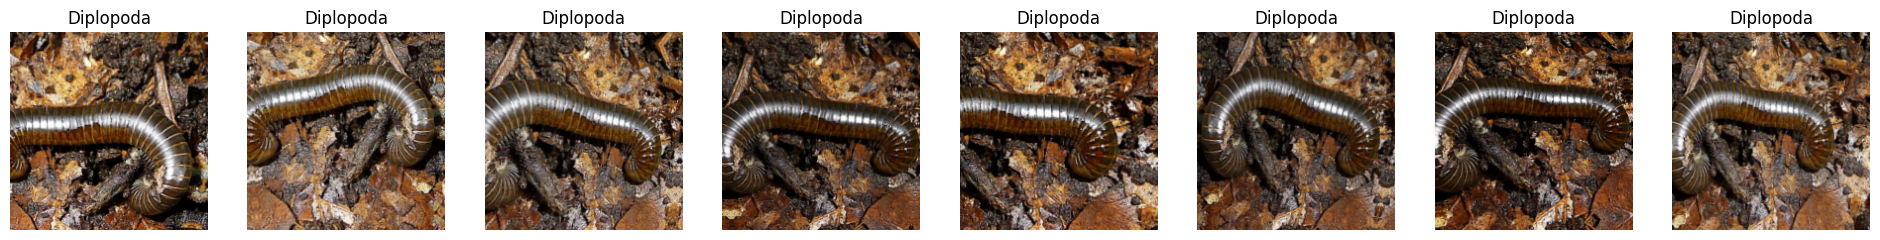

In [11]:
Artho = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=40),
    get_y=parent_label)

Artho = Artho.new(item_tfms=RandomResizedCrop(200, min_scale=0.5), batch_tfms=aug_transforms())
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [12]:
learn = vision_learner(dls, 'convnext_small', metrics=error_rate).to_fp16()
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.068202,0.713115,0.256098,02:09


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.518717,0.454608,0.085366,03:49
1,0.397633,0.332026,0.060976,03:57
2,0.328211,0.336415,0.073171,02:42
3,0.274248,0.336922,0.060976,02:44


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [13]:
learn.export('Artho_train_model.pkl')